In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()

# Part 1 - EDA
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15 minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them

In [2]:
logins = pd.read_json("logins.json")

In [3]:
logins = pd.to_datetime(logins.login_time)

logins = pd.DataFrame(logins).set_index("login_time")
logins["login"] = 1

In [4]:
intervals = logins.groupby(pd.Grouper(freq='15Min')).count()
intervals

,login
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


<AxesSubplot:xlabel='login_time'>

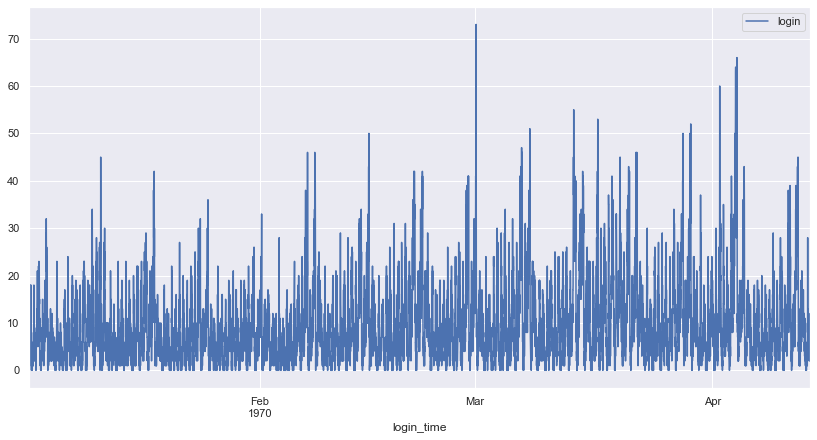

In [5]:
intervals.plot(figsize=(14, 7))

In [6]:
time_intervals = [6, 12, 24] 

for interval in time_intervals:
    intervals[f"{interval} hour max"] = intervals["login"].rolling(interval*4, 1).max()
    intervals[f"{interval} hour min"] = intervals["login"].rolling(interval*4, 1).min()
    intervals[f"{interval} hour mean"] = intervals["login"].rolling(interval*4, 1).mean()
    intervals[f"{interval} hour median"] = intervals["login"].rolling(interval*4, 1).median()

intervals.describe()

,login,6 hour max,6 hour min,6 hour mean,6 hour median,12 hour max,12 hour min,12 hour mean,12 hour median,24 hour max,24 hour min,24 hour mean,24 hour median
count,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000
mean,9.515938,21.397119,2.258378,9.515512,8.632611,26.640172,0.804761,9.516064,8.277432,31.334287,0.084593,9.520136,8.003984
std,8.328818,10.895827,3.310219,5.995665,6.216812,10.834265,1.536847,4.599421,4.809197,11.750846,0.312859,3.679103,3.356463
min,0.000000,2.000000,0.000000,1.291667,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,3.000000,14.000000,0.000000,5.291667,4.000000,19.000000,0.000000,6.270833,5.000000,22.000000,0.000000,6.781250,6.000000
50%,7.000000,19.000000,1.000000,8.208333,7.000000,24.000000,0.000000,8.125000,7.000000,28.000000,0.000000,8.489583,7.000000
75%,13.000000,26.000000,3.000000,11.791667,11.000000,31.000000,1.000000,11.395833,10.000000,41.000000,0.000000,11.760417,10.000000
max,73.000000,73.000000,28.000000,46.166667,45.500000,73.000000,15.000000,36.833333,33.500000,73.000000,2.000000,26.177083,23.000000


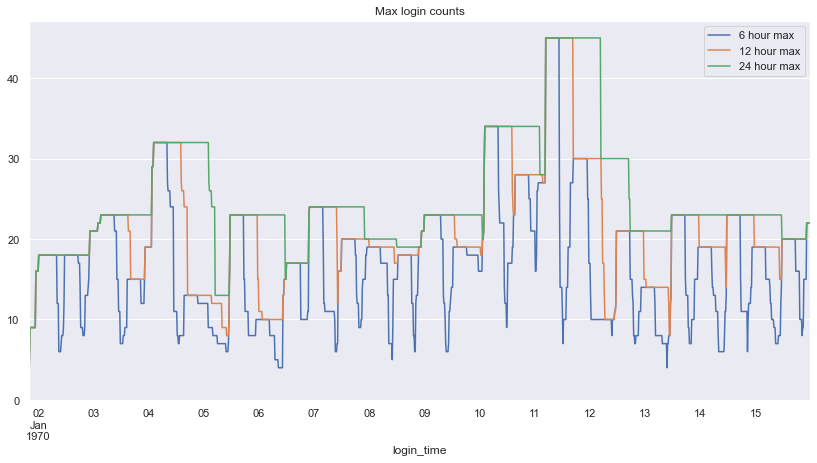

In [7]:
# Plot the rolling max of each of the time intervals.
for interval in time_intervals:
    intervals[f"{interval} hour max"].loc["1970-01-01":"1970-01-15"].plot(figsize=(14, 7), label=f"{interval} hour max")

plt.title("Max login counts")
plt.legend()
plt.show()

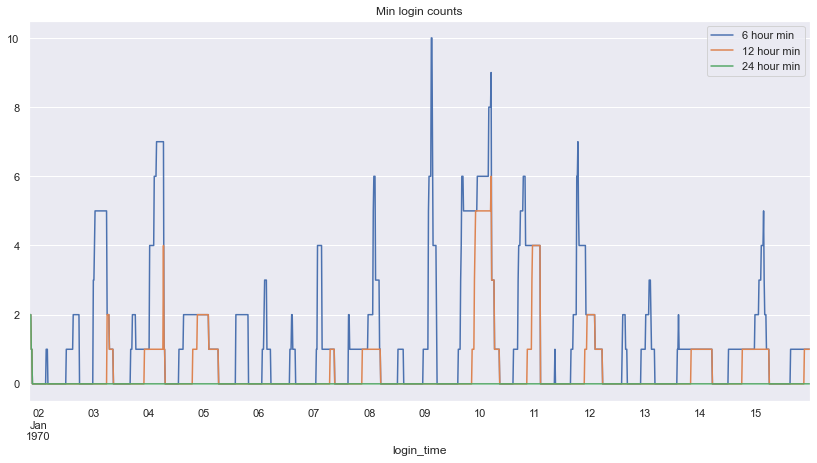

In [8]:
# Plot the rolling min of each of the time intervals.
for interval in time_intervals:
    intervals[f"{interval} hour min"].loc["1970-01-01":"1970-01-15"].plot(figsize=(14, 7), label=f"{interval} hour min")

plt.title("Min login counts")
plt.legend()
plt.show()

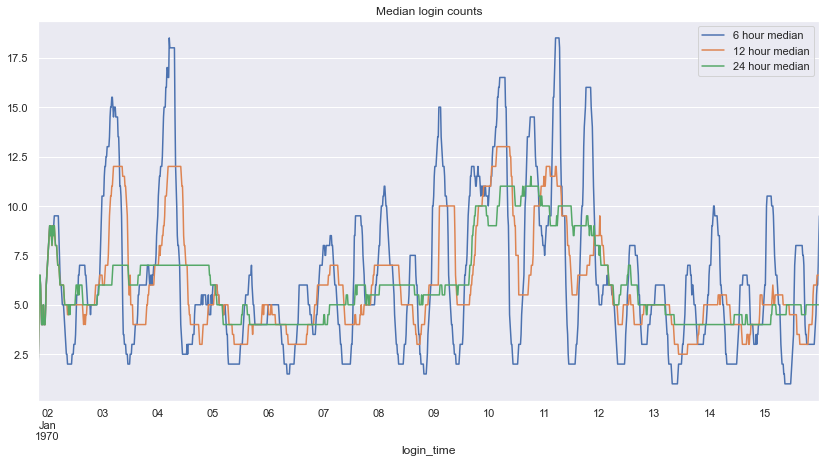

In [9]:
# Plot the rolling median of each of the time intervals.
for interval in time_intervals:
    intervals[f"{interval} hour median"].loc["1970-01-01":"1970-01-15"].plot(figsize=(14, 7), label=f"{interval} hour median")

plt.title("Median login counts")
plt.legend()
plt.show()

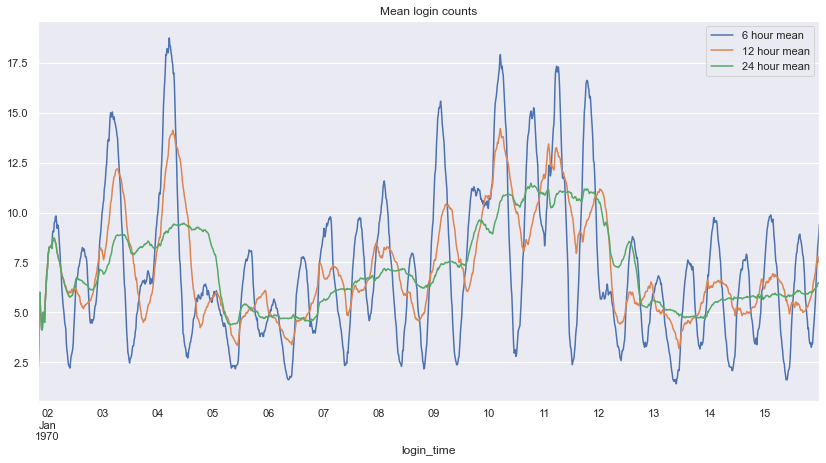

In [10]:
# Plot the rolling mean of each of the time intervals.
for interval in time_intervals:
    intervals[f"{interval} hour mean"].loc["1970-01-01":"1970-01-15"].plot(figsize=(14, 7), label=f"{interval} hour mean")

plt.title("Mean login counts")
plt.legend()
plt.show()

Many of the demand insights can be seen from the rolling min and max graphs. There are certain times of the day where there is little to no activity (max of less than 10 logins) that occurs almost daily. Then there are certainly some days of the week that seem to have a higher demand (min of around or above 6 logins).

# Part 2 - Experiment and Metrics Design
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    * how you will implement the experiment
    * what statistical test(s) you will conduct to verify the significance of the observation
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.


#### Answers

1. The metric used as a key measure of success would be the amount of money paid to the toll bridge. I would choose this metric because it is likely to be the easiest value to observe changes in once the experiment is implemented. 

2. The design of the experiment would be to set it up as a Difference in Differences(DD) experiment focusing on comparing the amount of money paid before the reimbursement goes into effect to after the reimbursement goes into effect. One important assumption is that there are parallel trends meaning that there aren't any events or anything else that effect the implementation of the experiment. The day the experiment starts would best be implemented on the weekend due to the difference in the activity in each city and checking to make sure that there aren't any events in either city which could effect travel are important to making sure the parellel trends assumption holds. 

To evaluate the DD experiment is evaluated using an ordinary least squares regression set up as: <br>
<br>
y = b * event + b1 * time + error <br>
<br>
b = effect of the event <br>
b1 = time coefficient 

The effect of the event would be measured in the coefficient b. The OLS regression would also compute the std. deviation and p-value for the coefficients and this would need to be taken into consideration when evaluating the effect of the experiment. Because the DD experiment's parallel trends assumption assumes that the amount of tolls paid by those that aren't driver partners would be approximately the same before and after the event. This value can be calculated from the difference of total tolls paid and the tolls reimbursed. Then the amount of tolls paid by driver partners before the event is calculated from the difference of the total tolls paid before the event and the amount paid by those that aren't driver partners. This would allow a comparison of the amount paid by driver partners before and after. This would also be able to show the effects on the weekdays by comparing a weekday before the event to a weekday after the event, but this effect may not be as accurate due to a greater amount of time passing since the event. DD experiments are most accurate by comparing values directly around the event. 

These results could provide important information such as if the reimbursement had a significant effect or not, the size of the effect, and how the effect varies from the weekday to the weekend. These results could also provide valuable recommendations to the cities no matter if they were significant or not. The caveats that would just be the assumptions of the DD experiment and would be important to inform the city operations team of. 

# Part 3 - Predictive Modeling

In [11]:
df = pd.read_json("ultimate_data_challenge.json")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Data Cleaning & EDA

For the data cleaning I would start by creating the retained users variable. This would include steps like making the date columns datetime types, finding the dates that retained users will be based off of and then creating a boolean variable for retained users. I would also replace null values with the mean for the ratings features and with "Not listed" for the phone category. 

For the EDA, I would look at all the variables that I might think have any correlation with retained users. This would be features like ultimate_black_user, ratings of driver and by the driver, avg_dist, avg_surge, phone type, weekday_pct, and trips_in_first_30_days. I would want to create visualizations of these variables compared to the retained users. For categorical variables, I would create count plots separating by retained users and for each category. For quantitative variables, I would create a box plot separating by retained users to show the distribution of the retained users for those variables. I would use these visualizations to look for insights and for discrepancies in the distribution of data. For those variables where there seemed to be discrepancies in the distributions, I would use statistical tests to assess if these discrepancies are statistically significant. I would use Chi-square tests for the categorical variables and use a t-test for quatitative variables. 

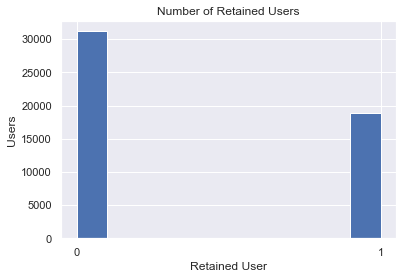

In [13]:
from datetime import timedelta

# Change the date features to datetime types using pandas.
df["signup_date"] = pd.to_datetime(df["signup_date"])
df["last_trip_date"] = pd.to_datetime(df["last_trip_date"])

# Find the most recent date and assume that that is the date to base retained users off of.
most_recent_date = df.last_trip_date.max()

# 30 days prior to the most recent date would be the date after which users are considered retained users. 
retained_user_time_frame = most_recent_date - timedelta(days=30)

# Create a retained user feature that will be the target variable. 
df["retained_user"] = 0
df.loc[df.last_trip_date >= retained_user_time_frame, "retained_user"] = 1

# Fill null values.
df[["avg_rating_of_driver", "avg_rating_by_driver"]] = df[["avg_rating_of_driver", "avg_rating_by_driver"]].fillna({"avg_rating_of_driver": df["avg_rating_of_driver"].mean(), 
                                                                                                                "avg_rating_by_driver": df["avg_rating_by_driver"].mean()})
df["phone"] = df["phone"].fillna("Not listed")

# Plot the distribution the status of all users. 
df.retained_user.plot(kind="hist")
plt.title("Number of Retained Users")
plt.xticks([False, True])
plt.xlabel("Retained User")
plt.ylabel("Users")

plt.show()

In [14]:
# Calculate the percentage of retained users.
retained = pd.crosstab(df["retained_user"], columns=df["ultimate_black_user"], margins=True)

retained_pct = retained / 50000

print(f"The percentage of retained users is {retained_pct.iloc[1,2]:.2%}.")

The percentage of retained users is 37.61%.


### Modeling

I am going to create a logistic regression model as it is a quick simple model used for classification. Because of its simplicity it is easy to gain insights from and this is valuable to Ultimate to know which variables may improve the chance of users being retained. 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Start by splitting the model into train and test sets and dropping the last_trip_date. 
df = df.drop(["last_trip_date", "city", "signup_date"], axis=1)
df = pd.get_dummies(df, columns=["phone"])

X_train, X_test, y_train, y_test = train_test_split(df.drop("retained_user", axis=1), df["retained_user"], test_size=0.2)

# Create a parameter grid for the grid search algorithm to work through to create the model with the best performance. 
param_grid = {"penalty": ["l1", "l2"],
              "C": np.arange(0.1, 1, 0.1),
              "solver": ["liblinear"]}

# Create the model and the grid search cross validation. 
logit = LogisticRegression()

logit_cv = GridSearchCV(logit, param_grid=param_grid, scoring="accuracy")

# Fit the model.
logit_cv.fit(X_train, y_train)

# Evaluate performance on the test set.
preds = logit_cv.predict(X_test)

print(classification_report(y_test, preds, target_names=["Not retained", "Retained"]))


              precision    recall  f1-score   support

Not retained       0.72      0.84      0.77      6282
    Retained       0.62      0.45      0.52      3718

    accuracy                           0.69     10000
   macro avg       0.67      0.64      0.65     10000
weighted avg       0.68      0.69      0.68     10000



In [16]:
# Get insights as to which features were most important for prediction.
params = logit_cv.best_params_
logit.set_params(**params)

logit.fit(X_train, y_train)
feature_importance = pd.concat([pd.Series(X_train.columns, name="feature"), pd.Series(logit.coef_.reshape([11]), name="coefficient")], axis=1)
feature_importance["abs_coeff"] = feature_importance["coefficient"].abs()

feature_importance.sort_values("abs_coeff", ascending=False)

,feature,coefficient,abs_coeff
4,ultimate_black_user,0.809173,0.809173
8,phone_Android,-0.659901,0.659901
10,phone_iPhone,0.419053,0.419053
2,avg_surge,-0.315593,0.315593
9,phone_Not listed,-0.143614,0.143614
0,trips_in_first_30_days,0.120321,0.120321
7,avg_rating_by_driver,-0.090006,0.090006
6,avg_dist,-0.029925,0.029925
1,avg_rating_of_driver,-0.009828,0.009828
3,surge_pct,0.004932,0.004932


Though this model didn't have incredible performance, it is clear that those that were ultimate black users in the first 30 days were more likely to be retained users than those that weren't. Also it appears that those that didn't have an Android phone were more likely to be retained users. The recommendation would be to have promotions for signing up to be an ultimate black user to encourage more people to sign up for that feature. Another recommendation would be to target ads towards people with iPhones as these people also seem to become retained users over people with Android phones. 